In [1]:
pip install pandas==0.19.2


You are using pip version 18.1, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.16.4

You are using pip version 18.1, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('facebook.csv')

In [4]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


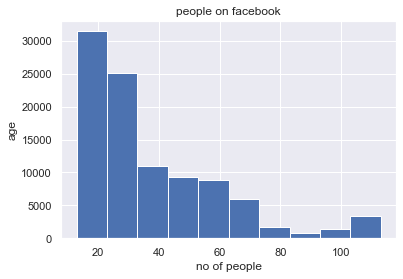

In [5]:
sns.set()
plt.hist(df['age'])
plt.xlabel("no of people")
plt.ylabel("age")
plt.title("people on facebook")
plt.show()

In [6]:
df['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [7]:
df['gender'].value_counts(dropna=False)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [8]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
df['age_group'] = pd.cut(df.age,bins=np.arange(10,121,10),labels=labels,right=True)
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


In [9]:
df.age_group.value_counts()

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3449
71-80       2249
91-100      1219
81-90        817
111-120      238
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='friend_count'>

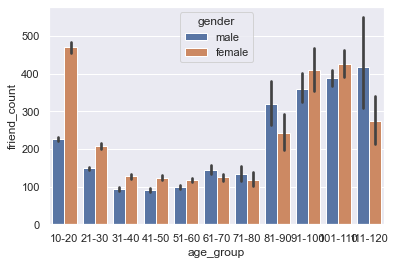

In [10]:
sns.barplot(x=df['age_group'],y=df['friend_count'],hue=df.gender)

In [11]:
#No of people having some friends
np.count_nonzero(df.friend_count)


97041

In [12]:
#All the people having zero friends
fc=df.friend_count==0
fc.value_counts()

False    97041
True      1962
Name: friend_count, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='friend_count'>

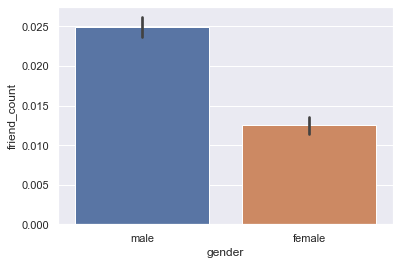

In [13]:
#plotting the gender vs zero friend count people
#fc=fbdata.friend_count==0
sns.barplot(y=df.friend_count==0,x=df.gender)

In [14]:
fcmale=(df.friend_count==0) & (df.gender=='male')
fcmale.value_counts(dropna=False)
#true:1459
fcfemale=(df.friend_count==0) & (df.gender=='female')
fcfemale.value_counts(dropna=False)
#true:503
fc=df.friend_count==0
fc.value_counts()

False    97041
True      1962
Name: friend_count, dtype: int64

In [15]:
df.tenure.interpolate(inplace=True)

In [16]:
tenlabel=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
df['year_group']=pd.cut(df.tenure,bins=np.arange(0,3300,365),labels=tenlabel,right=True)


In [17]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0-1 year


In [18]:
df.year_group.fillna(value='0-1 year',inplace=True)


In [19]:
df.year_group.value_counts(dropna=False)

0-1 year     43659
1-2 years    33366
2-3 years     9861
3-4 years     5448
4-5 years     4557
5-6 years     1507
6-7 years      581
7-8 years       15
8-9 years        9
Name: year_group, dtype: int64

In [22]:
#Most liked people
df.sort_values(by='likes_received', ascending=False)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years
49230,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,10-20,0-1 year
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year
98937,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,10-20,3-4 years
98936,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,10-20,2-3 years
98686,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years


In [24]:
df.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='age_group',columns='gender')

mobile_likes_received            mobile_likes              \
gender                   female       male       female        male   
age_group                                                             
10-20                288.892095  55.170300   248.751005   70.219224   
21-30                142.788701  35.941683   165.645013   58.071649   
31-40                106.549275  26.976407   174.898677   45.905372   
41-50                 97.832104  32.869807   176.355380   55.884914   
51-60                 72.727291  29.567209   133.077017   56.071445   
61-70                 60.727248  35.572059   111.957092   55.918953   
71-80                 32.637103  31.115423    78.029292   28.853731   
81-90                 74.779221  54.212411   109.277922   58.152745   
91-100                84.623742  74.919034   119.665996  112.838068   
101-110              102.235964  74.643403   103.120637   86.164914   
111-120               70.205128  39.491228    97.717949   48.956140   

          www_likes_received              www_likes             
gender                female       male      female       male  
age_group                                                       
10-20             197.664228  37.188514  130.071009  32.523265  
21-30              89.672343  21.587317   54.734040  15.024963  
31-40              68.240614  16.021157   50.029437  10.627516  
41-50              80.625032  21.322600   76.554821  17.016696  
51-60              72.171510  24.054958  105.640317  31.587360  
61-70              64.030883  30.433617  106.303088  47.149480  
71-80              34.965826  48.339303   84.175753  46.256716  
81-90              39.555844  38.513126   49.355844  48.704057  
91-100             53.507042  47.926136   61.603622  54.348011  
101-110            64.423369  40.510516   78.595599  44.470363  
111-120            56.555556  28.122807   67.606838  33.938596

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/tools/plotting.py:1175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='gender'>

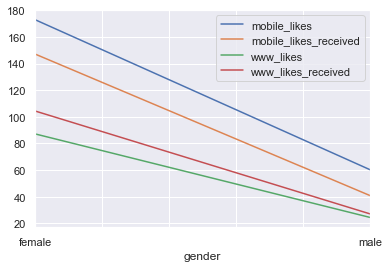

In [25]:
df.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received','www_likes'],index='gender').plot()

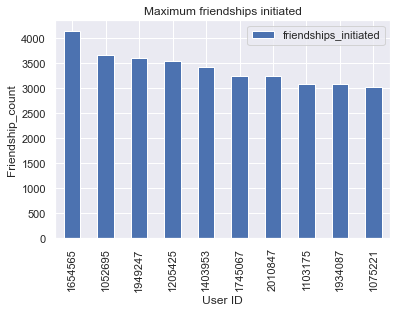

In [28]:
followers=df.sort_values(by='friendships_initiated',ascending=False)[:10]
followers.plot(x='userid',y='friendships_initiated',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title("Maximum friendships initiated")
plt.show()

In [29]:
followers['fc_per_day']=followers.friendships_initiated / followers.tenure
followers

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,fc_per_day
98993,1654565,19,15,1994,8,male,394.0,4538,4144,4501,15088,4435,5961,66,9127,10-20,1-2 years,10.517766
98842,1052695,22,23,1991,9,female,874.0,4297,3654,1968,2006,1825,1632,143,374,21-30,2-3 years,4.180778
98675,1949247,19,9,1994,11,female,434.0,4189,3594,927,2859,528,1290,399,1569,10-20,1-2 years,8.281106
98567,1205425,60,17,1953,6,female,1562.0,4794,3538,586,1318,560,960,26,358,51-60,4-5 years,2.265045
98347,1403953,19,11,1994,11,male,519.0,3693,3415,170,20,170,19,0,1,10-20,1-2 years,6.579961
98960,1745067,17,1,1996,1,female,947.0,4290,3238,3780,8185,1233,5380,2547,2805,10-20,2-3 years,3.419219
98898,2010847,18,10,1995,2,female,1084.0,4509,3233,2672,2053,2009,1074,663,979,10-20,2-3 years,2.982472
98949,1103175,15,24,1998,8,female,487.0,3661,3086,6815,6177,1500,3990,5315,2187,10-20,1-2 years,6.336756
98685,1934087,19,19,1994,5,male,575.0,4516,3078,954,3075,834,2464,120,611,10-20,1-2 years,5.353043
98835,1075221,22,23,1991,5,male,907.0,4693,3024,2028,948,1990,517,38,431,21-30,2-3 years,3.334068


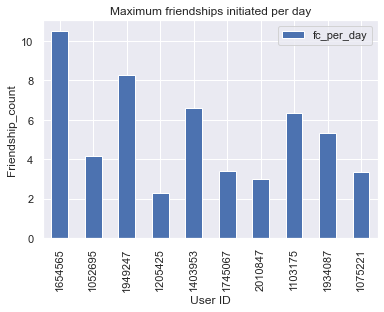

In [30]:
followers.plot(x='userid',y='fc_per_day',kind='bar')
plt.ylabel("Friendship_count")
plt.xlabel("User ID")
plt.title('Maximum friendships initiated per day')
plt.show()